In [1]:
import sys
sys.path.insert(0, '../models/')
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, CSVLogger
from tensorflow.keras.regularizers import L2
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from tensorflow_addons.layers import GroupNormalization

import numpy as np
import h5py
import scipy.io
np.random.seed(1337) # for reproducibility

from tensorflow.keras.layers import Input, Conv1D, Dense, LSTM, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation, AveragePooling1D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

from random import shuffle
#from pyfasta import Fasta
import gzip
import numpy as np
import re
import random


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from Bio import SeqIO

from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, CSVLogger
from tensorflow.keras.models import model_from_json
#from tensorflow.keras.models import model_from_yaml

from tensorflow.keras import layers

import numpy as np
import h5py
import scipy.io
np.random.seed(1337) # for reproducibility

from tensorflow.keras.layers import *
from tensorflow.keras.layers import Input,Conv1D, Dense,LSTM, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation,AveragePooling1D
from tensorflow.keras import *
#from group_norm import GroupNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import L2 ,L1
import keras
from tensorflow.keras.initializers import RandomUniform
import keras.backend as K
from random import shuffle
from sklearn.utils import class_weight
from tcn import TCN
from sklearn.preprocessing import OneHotEncoder



#from  pyfasta import Fasta
import gzip
import numpy as np
import re
import gensim

import random
#from data_gen import  DataGenerator_safe

2025-01-24 11:12:10.806591: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 11:12:10.823042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-24 11:12:10.843082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-24 11:12:10.849351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 11:12:10.863887: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num GPUs Available:  1
Num of GPUs available:  13


2025-01-24 11:12:15.004394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 14024 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:73:00.0, compute capability: 8.6


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
GRU Model Performance:
  Accuracy: 0.8918
  Sensitivity: 0.9036
  Specificity: 0.8806
  MCC: 0.7839
  AUC-ROC: 0.9448

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM Model Performance:
  Accuracy: 0.8929
  Sensitivity: 0.8767
  Specificity: 0.9083
  MCC: 0.7858
  AUC-ROC: 0.9359

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CNN Model Performance:
  Accuracy: 0.8645
  Sensitivity: 0.8789
  Specificity: 0.8507
  MCC: 0.7295
  AUC-ROC: 0.9211

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
FCN Model Performance:
  Accuracy: 0.8546
  Sensitivity: 0.8879
  Specificity: 0.8230
  MCC: 0.7115
  AUC-ROC: 0.9297

Ensemble Model Performance:
  Accuracy: 0.9049
  Sensitivity: 0.9170
  Specificity: 0.8934
  MCC: 0.8102
  AUC-ROC: 0.9629


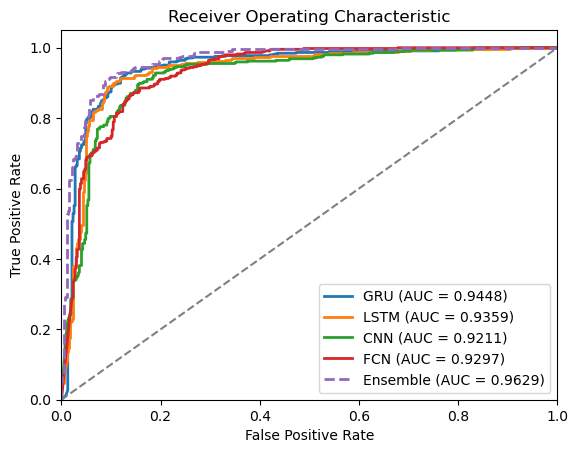

In [6]:
import numpy as np
import os
import gensim
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, matthews_corrcoef
from tensorflow.keras.layers import Input, GRU, LSTM, Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from matplotlib import pyplot as plt

# Load Word2Vec model
model = gensim.models.word2vec.Word2Vec.load('my_word2vec-model-DNA-3mer')

# Read data function
def read_seq_new(seq_file, label):
    seq_list = []
    seq = ''
    with open(seq_file, 'r') as fp:
        for line in fp:
            if line[0] == '>':
                if len(seq):
                    seq_list.append(seq)
                seq = ''
            else:
                seq += line.strip()
        if len(seq):
            seq_list.append(seq)
    seq_data = []
    all_data = []
    for s in seq_list:
        tmp = s[0:147]
        seq_data.append(tmp)
        all_data.append([label])
    return seq_data, all_data

# Load your data
seq_pos_data, all_data_pos = read_seq_new('datasets/S1-pos.txt', 1.0)
seq_neg_data, all_data_neg = read_seq_new('datasets/S1-neg.txt', 0.0)

# Prepare data
seq_pos_data = np.asarray(seq_pos_data)
seq_neg_data = np.asarray(seq_neg_data)
x_pos = np.zeros((len(seq_pos_data), 145, 100))
x_neg = np.zeros((len(seq_neg_data), 145, 100))

for ix, seq in enumerate(seq_pos_data):
    for iy in range(145):
        vec = model.wv[seq[iy:iy+3]]
        x_pos[ix, iy, :] = vec

for ix, seq in enumerate(seq_neg_data):
    for iy in range(145):
        vec = model.wv[seq[iy:iy+3]]
        x_neg[ix, iy, :] = vec

y = len(x_pos) * [1] + len(x_neg) * [0]
shuffled_indices = np.random.randint(0, len(y), len(y))
x = np.concatenate((x_pos, x_neg))
y = np.asarray(y)[shuffled_indices]
x = x[shuffled_indices]

# Train-test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_train = np.asarray(x_train, dtype=np.float32)
x_val = np.asarray(x_val, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.float32)

# Define models
def create_gru_model():
    inp = Input((145, 100))
    x = GRU(32, return_sequences=True)(inp)
    x = BatchNormalization()(x)
    x = GRU(64, return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inp, x)
    return model

def create_lstm_model():
    inp = Input((145, 100))
    x = LSTM(32, return_sequences=True)(inp)
    x = BatchNormalization()(x)
    x = LSTM(64, return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inp, x)
    return model

def create_cnn_model():
    inp = Input((145, 100))
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inp, x)
    return model

def create_fcn_model():
    inp = Input((145, 100))
    x = Flatten()(inp)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inp, x)
    return model

# Compile and train models
models = [create_gru_model(), create_lstm_model(), create_cnn_model(), create_fcn_model()]
model_names = ['GRU', 'LSTM', 'CNN', 'FCN']
y_scores_stack = []

for model, name in zip(models, model_names):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=16, epochs=50, validation_split=0.1, verbose=0)
    y_scores = model.predict(x_val)
    y_scores_stack.append(y_scores)
    
    # Calculate evaluation metrics for each model
    y_pred = (y_scores > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    specificity = (confusion_matrix(y_val, y_pred)[0, 0] /
                   (confusion_matrix(y_val, y_pred)[0, 0] + confusion_matrix(y_val, y_pred)[0, 1]))
    mcc = matthews_corrcoef(y_val, y_pred)
    auc_roc = roc_auc_score(y_val, y_scores)
    
    # Print results for individual models
    print(f"{name} Model Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  MCC: {mcc:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}\n")

# Average predictions for ensemble model
y_scores_avg = np.mean(y_scores_stack, axis=0)

# Calculate evaluation metrics for ensemble model
y_pred_final_avg = (y_scores_avg > 0.5).astype(int)
accuracy = accuracy_score(y_val, y_pred_final_avg)
sensitivity = recall_score(y_val, y_pred_final_avg)
specificity = (confusion_matrix(y_val, y_pred_final_avg)[0, 0] /
               (confusion_matrix(y_val, y_pred_final_avg)[0, 0] + confusion_matrix(y_val, y_pred_final_avg)[0, 1]))
mcc = matthews_corrcoef(y_val, y_pred_final_avg)
auc_roc = roc_auc_score(y_val, y_scores_avg)

# Print results for ensemble model
print("Ensemble Model Performance:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Sensitivity: {sensitivity:.4f}")
print(f"  Specificity: {specificity:.4f}")
print(f"  MCC: {mcc:.4f}")
print(f"  AUC-ROC: {auc_roc:.4f}")

# Plot ROC curves
plt.figure()
for y_scores, name in zip(y_scores_stack, model_names):
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_score(y_val, y_scores):.4f})')

# ROC curve for ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_val, y_scores_avg)
plt.plot(fpr_ensemble, tpr_ensemble, lw=2, label=f'Ensemble (AUC = {auc_roc:.4f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Save the figure
plt.savefig('roc_curve.png', dpi=300)  # Save as PNG file with high resolution
plt.show()

plt.close()  # Close the figure to free memory



In [3]:
model =gensim.models.word2vec.Word2Vec.load('my_word2vec-model-DNA-3mer')

In [4]:
model.corpus_count

279457

In [5]:
#model.most_similar('AAC')

In [6]:
#model.wv['AAA']

In [7]:
######## Read data ###############################
def read_seq_new(seq_file,label):
    seq_list = []
    seq = ''
    with open(seq_file, 'r') as fp:
        for line in fp:
            if line[0] == '>':
                if len(seq):
                    seq_list.append(seq)                    
                seq = ''
            else:
                seq = seq + line[:]
        
        if len(seq):
            seq_list.append(seq) 
    seq_data=[]
    all_data=[]
    for s in seq_list:
        tmp=s[0:147]
        seq_data.append(tmp)
        all_data.append([label])
    return seq_data, all_data


In [8]:
seq_pos_data, all_data_pos = read_seq_new('datasets/S1-pos.txt',1.0)
seq_neg_data, all_data_neg= read_seq_new('datasets/S1-neg.txt',0.0)

seq_pos_data=np.asarray(seq_pos_data)
seq_neg_data=np.asarray(seq_neg_data)


In [9]:
len(seq_neg_data)

2608

In [10]:
#all_data_pos[0]

In [11]:
x_pos = np.zeros((len(seq_pos_data),145,100)) # 41 is lenght of sequence 41-2=39, 100 is set in main file length of sentence
for ix, seq in enumerate(seq_pos_data):
    for iy in range(145):
        vec = model.wv[seq[iy:iy+3]]
        x_pos[ix,iy,:]=vec

In [12]:
x_pos.shape

(2567, 145, 100)

In [13]:
x_neg = np.zeros((len(seq_neg_data),145,100))
for ix, seq in enumerate(seq_neg_data):
    for iy in range(145):
        vec = model.wv[seq[iy:iy+3]]
        x_neg[ix,iy,:]=vec

In [14]:
x_neg.shape

(2608, 145, 100)

In [15]:
#x_neg

In [16]:
y= len(x_pos)*[1]+len(x_neg)*[0]

In [17]:
shuffled_indices =np.random.randint(0, len(y),len(y))
shuffled_indices

array([3223,  189,  860, ...,    9, 2181, 2500])

In [18]:
x = np.concatenate((x_pos,x_neg))
len(x)

5175

In [19]:
y=np.asarray(y)

In [20]:
y=y[shuffled_indices]

In [21]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [22]:
x=x[shuffled_indices]


In [23]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val= train_test_split(x,y, test_size=0.2)
x_train=np.asarray(x_train,dtype=np.float32)
x_val=np.asarray(x_val,dtype=np.float32)
y_train=np.asarray(y_train,dtype=np.float32)
y_val=np.asarray(y_val,dtype=np.float32)

In [24]:
x_train.shape

(4140, 145, 100)

In [25]:
y_train.shape

(4140,)

In [26]:
len(y_val)

1035

In [27]:
np.save('Fold/x_val',x_val)
#np.save('sec_folds/chem_ind_x_train',chem_ind_test_X)
np.save('Fold/y_val',y_val)

In [28]:
class CustomModelCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, model, filepath):
        super(CustomModelCheckpoint, self).__init__()
        self.model_for_saving = model
        self.path = filepath
    
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('val_loss')
        print("\nSaving model to : {}".format(self.path.format(epoch=epoch, val_loss=loss)))
        self.model_for_saving.save(self.path.format(epoch=epoch, val_loss=loss), overwrite=True)

def step_decay(epoch):
    lrate=[0.001]*30+[0.0001]*170
    print (lrate[epoch])
    return lrate[epoch]

############################################################################################################

model_name= 'EPI'
result_folder= 'results/'
if not os.path.exists(result_folder+model_name):
    os.makedirs(result_folder+model_name)

model_results_folder=result_folder+model_name+ '/'
best_weights = model_results_folder + 'best_weights.keras'
last_weights = model_results_folder + 'last_weights.keras'
model_arch = model_results_folder + 'model.jsno'
history_pth = model_results_folder + 'results.pickle'

In [42]:
from tensorflow.keras.layers import Input, GRU, Dropout, Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.models import Model

# Input layer
inp = Input((145, 100))

# CNN layers
x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)  # First convolutional layer
x = BatchNormalization()(x)  # Batch normalization
x = MaxPooling1D(pool_size=2)(x)  # First max pooling layer

x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)  # Second convolutional layer
x = BatchNormalization()(x)  # Batch normalization
x = MaxPooling1D(pool_size=2)(x)  # Second max pooling layer

# GRU layers
x = GRU(32, return_sequences=True)(x)  # First GRU layer with sequences
x = BatchNormalization()(x)  # Batch normalization
x = GRU(64, return_sequences=False)(x)  # Second GRU layer without sequences
x = BatchNormalization()(x)  # Batch normalization

# Flatten the output from the last GRU layer
x = Flatten()(x)

# Fully connected layers
x = Dense(64, activation='relu')(x)   # First dense layer
x = BatchNormalization()(x)  # Batch normalization
x = Dropout(0.25)(x)                  # Dropout for regularization

x = Dense(32, activation='relu')(x)   # Second dense layer
x = BatchNormalization()(x)  # Batch normalization

# Output layer
x = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Define the model
model = Model(inp, x)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 145, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 143, 32)        │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 143, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 71, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 69, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 69, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 34, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 34, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 64)             │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,489 (201.13 KB)

 Trainable params: 50,913 (198.88 KB)

 Non-trainable params: 576 (2.25 KB)

None


In [43]:
if not os.path.exists(result_folder+model_name):
    os.makedirs(result_folder+model_name)

model_results_folder=result_folder+model_name+ '/'
history_pth = model_results_folder + 'results.pickle'


model_json = model.to_json()
with open(model_results_folder+"model.json", "w") as json_file:
    json_file.write(model_json)

checkpoint = ModelCheckpoint(best_weights, monitor='val_acc', verbose=1, save_best_only=False, mode='max')

checkpointsString = model_results_folder + 'weights.{epoch:02d}-{val_loss:.2f}.keras'
lrate = LearningRateScheduler(step_decay)
callbacks = [lrate, CustomModelCheckpoint(model, checkpointsString),checkpoint]



In [44]:
opt = Adam(learning_rate=0.0005,amsgrad = True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
history = model.fit(x_train,y_train,batch_size=16,epochs=50,shuffle=True, validation_split=0.1,callbacks=callbacks)

#history = model.fit(x_train,y_train,batch_size=16,epochs=100,shuffle=True, validation_data=(x_val,y_val),callbacks=callbacks)



0.001
Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5693 - loss: 0.7432
Saving model to : results/EPI/weights.00-0.69.keras

Epoch 1: saving model to results/EPI/best_weights.keras
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5695 - loss: 0.7430 - val_accuracy: 0.5459 - val_loss: 0.6907 - learning_rate: 0.0010
0.001
Epoch 2/50
230/233 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7738 - loss: 0.4894
Saving model to : results/EPI/weights.01-0.37.keras

Epoch 2: saving model to results/EPI/best_weights.keras
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7742 - loss: 0.4887 - val_accuracy: 0.8527 - val_loss: 0.3677 - learning_rate: 0.0010
0.001
Epoch 3/50
231/233 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8663 - loss: 0.3192
Saving model to : results/EPI/weights.02-0.30.keras

Epoch 3: saving model to results/EPI/best_weights.keras
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8663 - loss: 0.3192 - val_accuracy: 0.8792 - val_loss

In [46]:
import pickle
with open(history_pth, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


In [47]:
model.load_weights(best_weights)

In [48]:
y_scores= model.predict(x_val)
y_true=y_val

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step



Area under the ROC curve: 0.9646106272687888

Area under Precision-Recall curve: 0.9581560240538504
Global Accuracy: 0.914975845410628
Specificity: 0.9026717557251909
Sensitivity: 0.9275929549902152

F1 score (F-measure): 0.9150579150579149
MCC: 0.8302864166986182


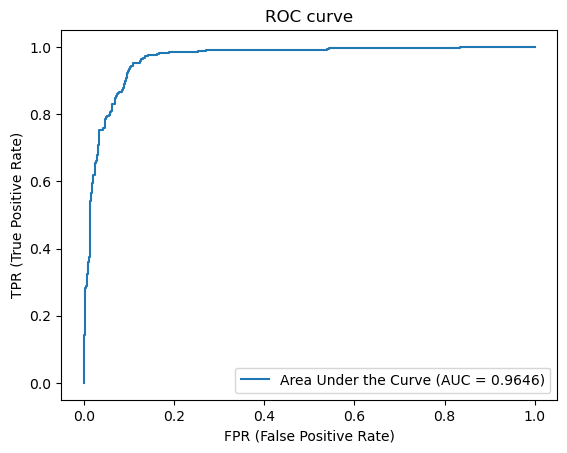

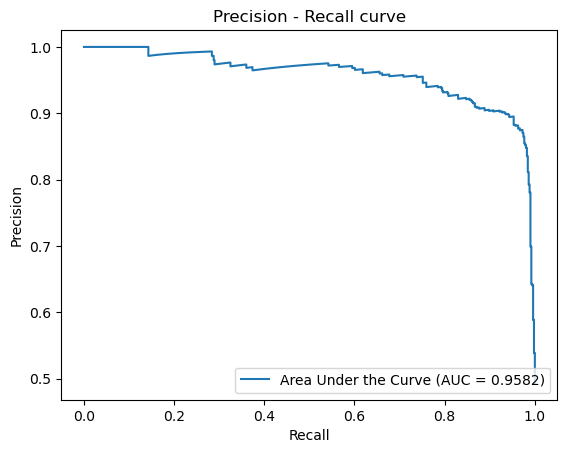

In [49]:
#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
%matplotlib inline
#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
# test_integral = np.trapz(tpr,fpr) #trapz is numpy integration
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(path_experiment+"ROC.png")
plt.savefig('Promoter-dataset-1-one-hot-code-ROC.png')
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0]  #so the array is increasing (you won't get negative AUC)
recall = np.fliplr([recall])[0]  #so the array is increasing (you won't get negative AUC)
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(path_experiment+"Precision_recall.png")

#Confusion matrix
threshold_confusion = 0.5
#print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
#print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
#print ("Precision: " +str(precision))

#Jaccard similarity index
#jaccard_index = jaccard_similarity_score(y_true, y_pred, normalize=True)
#print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))

mcc= matthews_corrcoef(y_true, y_pred)
print ('MCC:', mcc)


In [50]:
def plot_confusion_matrix(cm, classes,
                              normalize=True,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        #plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [51]:
import itertools

Normalized confusion matrix
[[0.90267176 0.09732824]
 [0.07240705 0.92759295]]


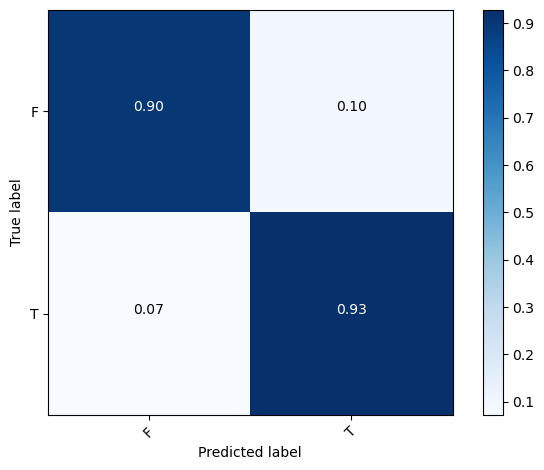

In [52]:
plot_confusion_matrix(confusion,classes=['F','T'])
plt.savefig('Shahid-dataset-1-confusionMatrix-4mer.jpg')